In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
works = pd.read_csv('../data/works.csv')
tags = pd.read_csv('../data/tags.csv')

def tags_dict():
    print("tags data dict:")
    print("tag ID")
    print("tag type (e.g. Warning, Fandom, Relationship)")
    print("tag name (unless the tag has fewer than 5 uses)")
    print("canonical or not")
    print("an approximate number of uses")
    print("merger ID (i.e. the tag's canonical version, if it has one)")


def works_dict():
    print("works data dict:")
    print("creation date")
    print("language")
    print("word count")
    print("restricted or not")
    print("complete or not")
    print("associated tag IDs")

In [5]:
atla_tag = tags.loc[(tags['type'] == 'Fandom') & (tags['name'].astype('string').str.contains('Avatar'))]['id'].values[0]

In [6]:
atla_works = works.loc[works['tags'].astype('string').str.contains(str(atla_tag))]

In [7]:
atla_works['year'] = atla_works['creation date'].str[:4]
atla_works['month'] = atla_works['creation date'].str[5:7]
atla_works['sm_date'] = atla_works['creation date'].str[0:7]
atla_works.sort_values(by='sm_date')

C:\Users\isiyb\AppData\Local\Temp\ipykernel_13296\524386743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atla_works['year'] = atla_works['creation date'].str[:4]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_13296\524386743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atla_works['month'] = atla_works['creation date'].str[5:7]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_13296\524386743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year,month,sm_date
7269680,2008-09-13,en,False,True,1695.0,63+64+10+65+66+67+68+23+76+16+1125,NaN,2008,09,2008-09
7269121,2008-09-20,en,False,True,661.0,363+109+23+9+1391+14+366+365,NaN,2008,09,2008-09
7269128,2008-09-20,en,False,True,9296.0,11+414+409+1364+386+22+415+1365+30558+72762+16,NaN,2008,09,2008-09
7269140,2008-09-20,en,False,True,5093.0,414+1364+409+1430+116+11+1433+386+415+1365+154...,NaN,2008,09,2008-09
7269146,2008-09-20,en,False,True,6254.0,1443+1444+465+447+184+116+11+1447+338+1448+337...,NaN,2008,09,2008-09
...,...,...,...,...,...,...,...,...,...,...
103660,2021-02-09,en,False,False,13307.0,9+133185+105692+11006+142528+4622+4625+2927+11...,NaN,2021,02,2021-02
103658,2021-02-09,en,False,True,4803.0,9+969647+3995840+5361847+2271+2332+2845+2842+4...,NaN,2021,02,2021-02
103657,2021-02-09,en,False,False,1800.0,11+254648+218280+49896827+51132993+45555418+45...,NaN,2021,02,2021-02
103645,2021-02-09,en,False,True,1347.0,11+254648+28596122+38746603+45461170+48113455+...,NaN,2021,02,2021-02


In [8]:
atla_sm_dates = atla_works['sm_date'].value_counts().to_frame().sort_values(by='sm_date').reset_index()

In [10]:
atla_sm_dates

,sm_date,count
0,2008-09,97
1,2008-10,60
2,2008-11,61
3,2008-12,33
4,2009-01,60
...,...,...
145,2020-10,66538
146,2020-11,58090
147,2020-12,72235
148,2021-01,71708


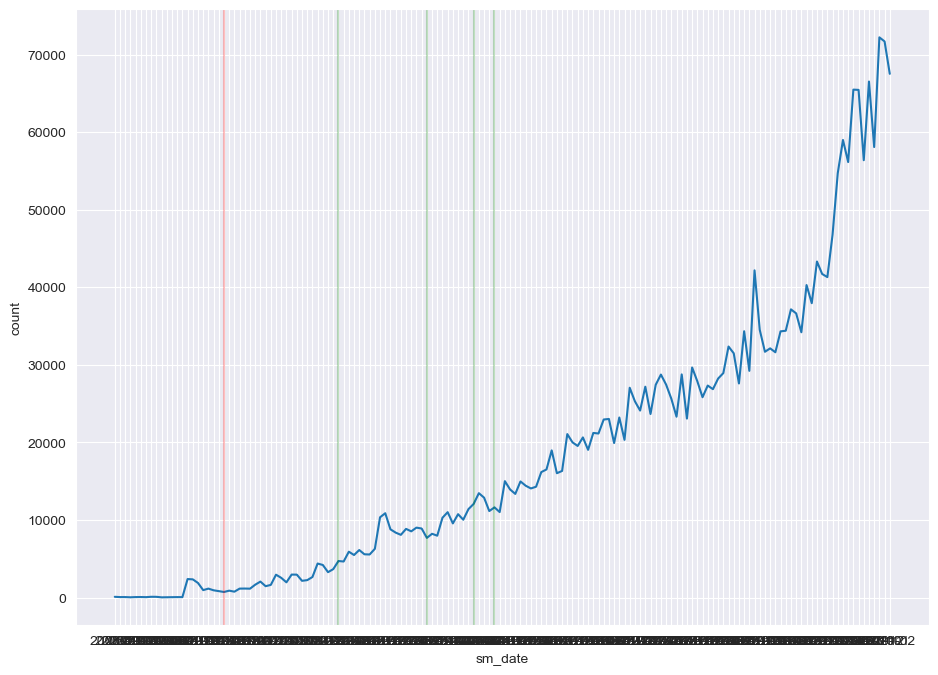

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=atla_sm_dates, x=atla_sm_dates['sm_date'], y=atla_sm_dates['count'])
plt.axvline(x='2010-06', color='red', alpha=0.25)
plt.axvline(x='2012-04', color='green', alpha=0.25)
plt.axvline(x='2013-09', color='green', alpha=0.25)
plt.axvline(x='2014-06', color='green', alpha=0.25)
plt.axvline(x='2014-10', color='green', alpha=0.25)
plt.show()

In [13]:
atla_works['complete'].value_counts()

complete
True     2145401
False     591304
Name: count, dtype: int64

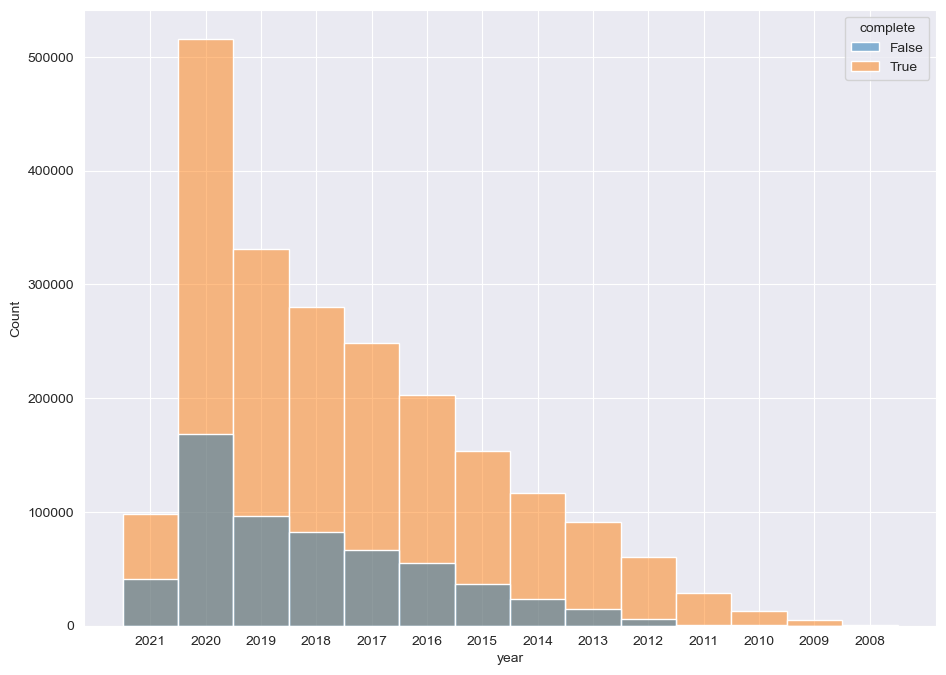

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.histplot(data=atla_works, x=atla_works['year'], hue=atla_works['complete'])
plt.show()